# Predicting the revenue using a Radom Forest Regression Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [2]:
icecream_df = pd.read_csv('Icecream_Data.csv')
X = icecream_df['Temperature'].values
y = icecream_df['Revenue'].values

In [3]:
icecream_df.head() 

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [5]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))


<ipython-input-5-cade36db796f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))


RandomForestRegressor(n_estimators=10, random_state=0)

In [6]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [7]:
y_train_p = regressor.predict(X_train.reshape(-1,1))

In [8]:
df_rf = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df_rf.head()


,Real Values,Predicted Values
0,515.459102,508.662849
1,501.345330,548.345160
2,458.860905,500.225759
3,706.364904,687.814971
4,697.147473,670.298193


In [9]:
#Test data
print('mae=',mean_absolute_error(y_test,y_pred))

mae= 27.060157399409995


In [10]:
#Test data
print('mse=', metrics.mean_squared_error(y_test,y_pred))

mse= 1141.8238631294578


In [12]:
#Test data
print('rmse=', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

rmse= 33.79088432002717


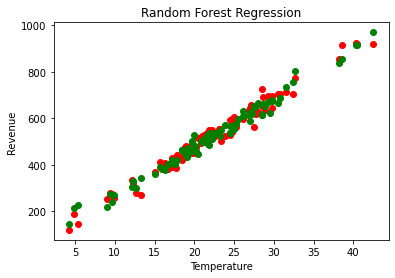

In [13]:

# # Visualising the Random Forest Regression Results  
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

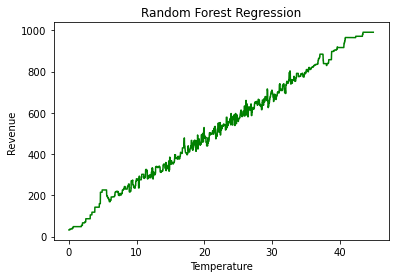

In [14]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()